In [2]:
#Importação das bibliotecas necessárias

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
import warnings
from pycaret.classification import *



In [3]:
# Configurações

pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#Leitura do arquivo com a base de dados completa

df = pd.read_csv(r'/Users/thiagoarmindo/Documents/TCC POS - CIENCICA DE DADOS E BIG DATA/TCC Thiago/archive/loan.csv')

In [5]:
# Verificação da quantidade de linhas e colunas

df.shape

(2260668, 145)

In [6]:
#Verificação das cinco primeiras linhas do df para se ter noção de como estão os dados

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0000,36 months,13.5600,84.9200,C,C1,Chef,10+ years,RENT,55000.0000,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.2400,0.0000,Apr-2001,1.0000,NaN,45.0000,9.0000,1.0000,4341,10.3000,34.0000,w,2386.0200,2386.0200,167.0200,167.0200,113.9800,53.0400,0.0000,0.0000,0.0000,Feb-2019,84.9200,Mar-2019,Feb-2019,0.0000,NaN,1,Individual,NaN,NaN,NaN,0.0000,0.0000,16901.0000,2.0000,2.0000,1.0000,2.0000,2.0000,12560.0000,69.0000,2.0000,7.0000,2137.0000,28.0000,42000.0000,1.0000,11.0000,2.0000,9.0000,1878.0000,34360.0000,5.9000,0.0000,0.0000,140.0000,212.0000,1.0000,1.0000,0.0000,1.0000,NaN,2.0000,NaN,0.0000,2.0000,5.0000,3.0000,3.0000,16.0000,7.0000,18.0000,5.0000,9.0000,0.0000,0.0000,0.0000,3.0000,100.0000,0.0000,1.0000,0.0000,60124.0000,16901.0000,36500.0000,18124.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0000,60 months,18.9400,777.2300,D,D2,Postmaster,10+ years,MORTGAGE,90000.0000,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.5200,0.0000,Jun-1987,0.0000,71.0000,75.0000,13.0000,1.0000,12315,24.2000,44.0000,w,29387.7500,29387.7500,1507.1100,1507.1100,612.2500,894.8600,0.0000,0.0000,0.0000,Feb-2019,777.2300,Mar-2019,Feb-2019,0.0000,NaN,1,Individual,NaN,NaN,NaN,0.0000,1208.0000,321915.0000,4.0000,4.0000,2.0000,3.0000,3.0000,87153.0000,88.0000,4.0000,5.0000,998.0000,57.0000,50800.0000,2.0000,15.0000,2.0000,10.0000,24763.0000,13761.0000,8.3000,0.0000,0.0000,163.0000,378.0000,4.0000,3.0000,3.0000,4.0000,NaN,4.0000,NaN,0.0000,2.0000,4.0000,4.0000,9.0000,

In [7]:
# Como o objetivo é verificar os clientes que estão inadimplentes ou não, é necessário verificar como o dataset classifica o cliente a partir da coluna 'loan_status'

qtd_status_contratos = df['loan_status'].value_counts()
print(qtd_status_contratos)

loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64


In [8]:
# Para verificar o perfil do cliente inadimplente, é necessário manter somente os contratos ativos ou que foram negativados 
# totalmente, ou seja, que ainda estão sendo pagos ou considerados como perdas, sendo assim, 
# é necessário filtrar o df para manter somente as linhas com os contratos desejados

status_desejados = ['Current', 'Late (31-120 days)', 'In Grace Period', 'Charged Off', 'Late (16-30 days)']

# Filtrar o df para manter apenas as linhas com esses status
df_filtrado = df[df['loan_status'].isin(status_desejados)]
df_filtrado.reset_index(drop=True, inplace=True)

In [9]:
# Verificar a quantidade de nulos em cada coluna

nulos_por_coluna = df_filtrado.isnull().sum().sort_values(ascending=False)
print(nulos_por_coluna)


id                                            1215936
member_id                                     1215936
url                                           1215936
orig_projected_additional_accrued_interest    1208939
hardship_type                                 1206841
hardship_reason                               1206841
hardship_status                               1206841
deferral_term                                 1206841
hardship_amount                               1206841
hardship_start_date                           1206841
hardship_end_date                             1206841
payment_plan_start_date                       1206841
hardship_length                               1206841
hardship_dpd                                  1206841
hardship_loan_status                          1206841
hardship_payoff_balance_amount                1206841
hardship_last_payment_amount                  1206841
desc                                          1196688
sec_app_mths_since_last_majo

In [10]:
# Colunas com muitos valores nulos podem não ser relevantes para análise, devido a isso, 
# pode-se remover colunas com grande quantidade de valores ausentes

max_percent_nulos = 0.1  # Limite de 10% de linhas com valores nulos
remover_colunas = df_filtrado.columns[df_filtrado.isnull().mean() > max_percent_nulos]
df_filtrado = df_filtrado.drop(columns=remover_colunas)

In [11]:
# Verificação das colunas categóricas

colunas_categoricas = df_filtrado.select_dtypes(include='object').columns.to_list()

for i in range(len(colunas_categoricas)):
    print(colunas_categoricas[i])

term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
pymnt_plan
purpose
title
zip_code
addr_state
earliest_cr_line
initial_list_status
last_pymnt_d
last_credit_pull_d
application_type
hardship_flag
disbursement_method
debt_settlement_flag


In [12]:
# Após a verificação das colunas categóricas restantes e seus dados, pode-se remover mais algumas colunas que não serão relevantes para análise

df_filtrado = df_filtrado.drop(columns=['grade','sub_grade','emp_title','emp_length','home_ownership',
                                        'pymnt_plan','purpose','title','addr_state','earliest_cr_line',
                                        'initial_list_status','last_pymnt_d','last_credit_pull_d',
                                        'hardship_flag','disbursement_method','debt_settlement_flag','zip_code','policy_code'])
df_filtrado.shape

(1215936, 68)

In [13]:
# Após selecionar as colunas categóricas que permanecerão no dataset, é preciso realizar o tratamento para sua utilização

#Conversão coluna 'issue_d' para data
df_filtrado['issue_d'] = pd.to_datetime(df_filtrado['issue_d'], format='%b-%Y')

In [14]:
# Transformação da coluna 'term' em binaria, visto que somente existem as opções de 36 months e 60 months, sendo assim atribuido
#  0 para 36 months e 1 para 60 months

le = LabelEncoder()
df_filtrado['tempo_contrato'] = le.fit_transform(df_filtrado['term'])

In [15]:
# Transformação da coluna 'verification_status', as opções nesta coluna são Source Verified, Verified e Not Verified, as duas primeiras 
# opções serão agrupada pois significam a mesma coisa, sendo assim a coluna ficará com valores 1 para rendas verificadas e 0 para não verificadas

df_filtrado['renda_verificada'] = df_filtrado['verification_status'].apply(lambda x: 1 if x in ['Source Verified', 'Verified'] else 0)

In [16]:
# Transformação da coluna 'loan_status', essa coluna informa o status atual do contrato, com as opções de 'Current', 'In Grace Period', 
# 'Late (31-120 days)', 'Charged Off', 'Late (16-30 days)', as duas primeiras opções indicam que o cliente esta adimplente, 
# e as outras o cliente esta inadimplente, sendo assim atribuido o valor 0 para adimplente e 1 para inadimplente

df_filtrado['cliente_inadimplente'] = df_filtrado['loan_status'].apply(lambda x: 0 if x in ['Current', 'In Grace Period'] else 1)

In [17]:
# Transformação da coluna 'application_type' em binaria, visto que somente existem as opções de Individual e Joint App, 
# sendo assim atribuido 0 para Individual e 1 para Joint App

df_filtrado['tipo_solicitacao'] = le.fit_transform(df_filtrado['application_type'])

In [18]:
# Após o tratamento das colunas categóricas, é possível remover as colunas originais para evitar redundância de dados

df_tratado = df_filtrado.drop(columns=['term','verification_status','loan_status','application_type'])

In [19]:
# Com as colunas categóricas tratadas, é possível iniciar o tratamento das colunas numéricas

# Resumo das informações das colunas númericas

df_tratado.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,tempo_contrato,renda_verificada,cliente_inadimplente,tipo_solicitacao
count,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936,1214475.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1214816.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000,1215930.0000,1215936.0000,1205618.0000,1205618.0000,1205618.0000,1209050.0000,1205563.0000,1194652.0000,1194100.0000,1215930.0000,1215936.0000,1165627.0000,1205617.0000,1205617.0000,1205618.0000,1209050.0000,1195474.0000,1205618.0000,1205618.0000,1205618.0000,1207672.0000,1205618.0000,1205618.0000,1205618.0000,1205618.0000,1205618.0000,1207672.0000,1157157.0000,1205618.0000,1205618.0000,1205618.0000,1205595.0000,1194540.0000,1215818.0000,1215935.0000,1205618.0000,1209050.0000,1209050.0000,1205618.0000,1215936.0000,1215936.0000,1215936.0000,1215936.0000
mean,15844.0869,15842.2979,15833.1780,13.4779,458.5099,78323.8605,2017-03-16 22:10:35.101847040,19.7295,0.3054,0.5245,11.7007,0.1891,16808.8904,49.6267,23.3738,8266.2586,8264.4031,7875.3626,7870.2021,5171.9347,2448.7852,2.0257,252.6170,41.9274,490.2367,0.0202,0.0035,216.9449,138987.4713,35302.6231,4.5099,13060.5358,11918.6290,56.8939,0.0081,11.0771,125.0882,179.5102,14.4251,8.4695,1.3912,25.0566,0.4983,3.7422,5.7135,4.8258,7.3673,8.3021,8.2807,13.4672,5.6568,11.6802,0.0005,0.0024,0.0801,2.0568,94.0299,41.0751,0.1268,0.0441,175742.8772,52123.6785,23892.0305,45075.6755,0.3604,0.6641,0.2363,0.0849
min,900.0000,900.0000,0.0000,5.3100,7.6100,0.0000,2007-08-01 00:00:00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,8500.0000,8500.0000,8500.0000,9.9300,261.1400,45300.0000,2016-05-01 00:00:00,12.3600,0.0000,0.0000,8.0000,0.0000,5969.0000,30.6000,15.0000,777.4000,776.6900,2590.7500,2587.7575,1563.7100,652.8800,0.0000,0.0000,0.0000,257.8800,0.0000,0.0000,0.0000,28331.2500,15000.0000,2.0000,2990.0000,1871.0000,34.0000,0.0000,0.0000,92.0000,113.0000,4.0000,3.0000,0.0000,6.0000,0.0000,2.0000,3.0000,3.0000,4.0000,3.0000,5.0000,8.0000,3.0000,8.0000,0.0000,0.0000,0.0000,1.0000,91.3000,0.0000,0.0000,0.0000,50425.0000,21053.0000,8500.0000,15300.0000,0.0000,0.0000,0.0000,0.0000
50%,14000.0000,14000.0000,14000.0000,12.7900,388.6200,65000.0000,2017-08-01 00:00:00,18.5400,0.0000,0.0000,11.0000,0.0000,11479.0000,49.3000,21.0000,5860.6750,5856.9800,5511.7250,5507.4700,3440.3100,1453.6850,0.0000,0.0000,0.0000,388.2400,0.0000,0.0000,0.0000,73431.0000,26100.0000,4.0000,6857.0000,5829.0000,58.7000,0.0000,0.0000,130.0000,161.0000,9.0000,6.0000,1.0000,14.0000,0.0000,3.0000,5.0000,4.0000,6.0000,6.0000,7.0000,12.0000,5.

In [20]:
# Normalizar os dados e tratar outliers através da Normalização Robust Scale, que utiliza a mediana e o IQR para transformar os dados

colunas_numericas = df_tratado.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Não normalizar as colunas binarias criadas
colunas_binarias= ['tempo_contrato', 'renda_verificada', 'cliente_inadimplente', 'tipo_solicitacao']

colunas_normalizadas = [col for col in colunas_numericas if col not in colunas_binarias]

scaler = RobustScaler()

df_tratado[colunas_normalizadas] = scaler.fit_transform(df_tratado[colunas_normalizadas])

In [21]:
# Com esses tratamentos, o dataframe ficou com o seguinte tamanho

df_tratado.shape

(1215936, 68)

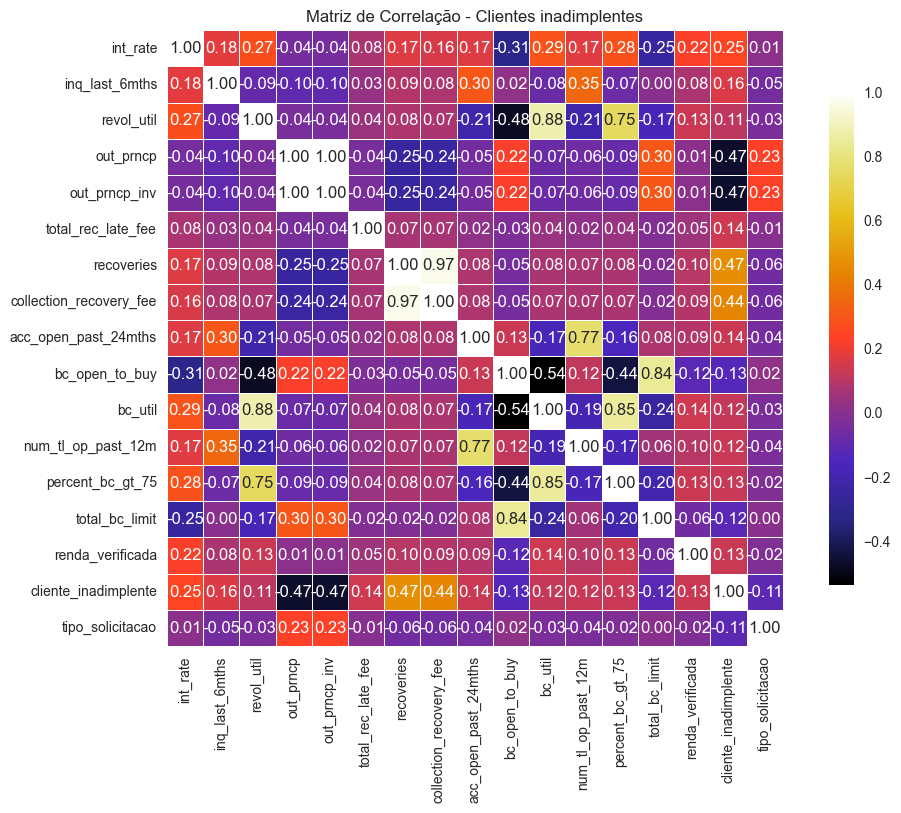

In [22]:
# O dataframe esta com uma quantidade expressiva de colunas, portanto, para diminuir a dimensionalidade dos dados, 
# é possível filtrar as colunas que possuem alguma correlação com a coluna alvo 'cliente_inadimplente'

df_numerico = df_tratado.select_dtypes(include=['float64', 'int64'])

matriz_correlacao = df_numerico.corr()

# Filtrar correlações maiores que 0.1 ou menores que -0.1 com a coluna 'cliente_inadimplente'
corr_filtrada = matriz_correlacao['cliente_inadimplente'][ 
    (matriz_correlacao['cliente_inadimplente'] > 0.1) | 
    (matriz_correlacao['cliente_inadimplente'] < -0.1)
]

# Criar uma nova matriz de correlação apenas com colunas que têm correlação relevante
corr_filtrada = matriz_correlacao.loc[corr_filtrada.index, corr_filtrada.index]


plt.figure(figsize=(12, 8))
sns.heatmap(corr_filtrada, cmap='CMRmap', annot=True, fmt=".2f", square=True, 
             linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8}) 
plt.title('Matriz de Correlação - Clientes inadimplentes')
plt.show()

In [23]:
# Após a definição das colunas mais relevantes, é possível prosseguir a análise com o dataframe limpo

colunas_corr = corr_filtrada.index

df_limpo = df_tratado[colunas_corr]

# O dataframe resultante contém 17 colunas
print(df_limpo.shape)
df_limpo.head()

(1215936, 17)


,int_rate,inq_last_6mths,revol_util,out_prncp,out_prncp_inv,total_rec_late_fee,recoveries,collection_recovery_fee,acc_open_past_24mths,bc_open_to_buy,bc_util,num_tl_op_past_12m,percent_bc_gt_75,total_bc_limit,renda_verificada,cliente_inadimplente,tipo_solicitacao
0,0.1228,1.0000,-1.0263,-0.2927,-0.2925,0.0000,0.0000,0.0000,1.2500,2.1735,-1.0932,0.5000,-0.4993,0.8633,0,0,0
1,0.9809,0.0000,-0.6605,1.9822,1.9827,0.0000,0.0000,0.0000,1.5000,0.6043,-1.0435,2.0000,-0.4993,-0.0837,1,0,0
2,0.8262,0.0000,-0.7947,-0.0904,-0.0901,0.0000,0.0000,0.0000,0.0000,0.6072,-1.2153,-1.0000,-0.4993,-0.1365,1,0,0
3,0.9809,0.0000,0.7579,-0.1709,-0.1706,0.0000,0.0000,0.0000,0.2500,-0.3497,0.3416,0.5000,1.0000,-0.5242,1,0,0
4,0.5343,0.0000,-1.2026,1.9781,1.9786,0.0000,0.0000,0.0000,1.2500,0.2013,-1.0311,1.5000,-0.4993,-0.3348,0,0,0


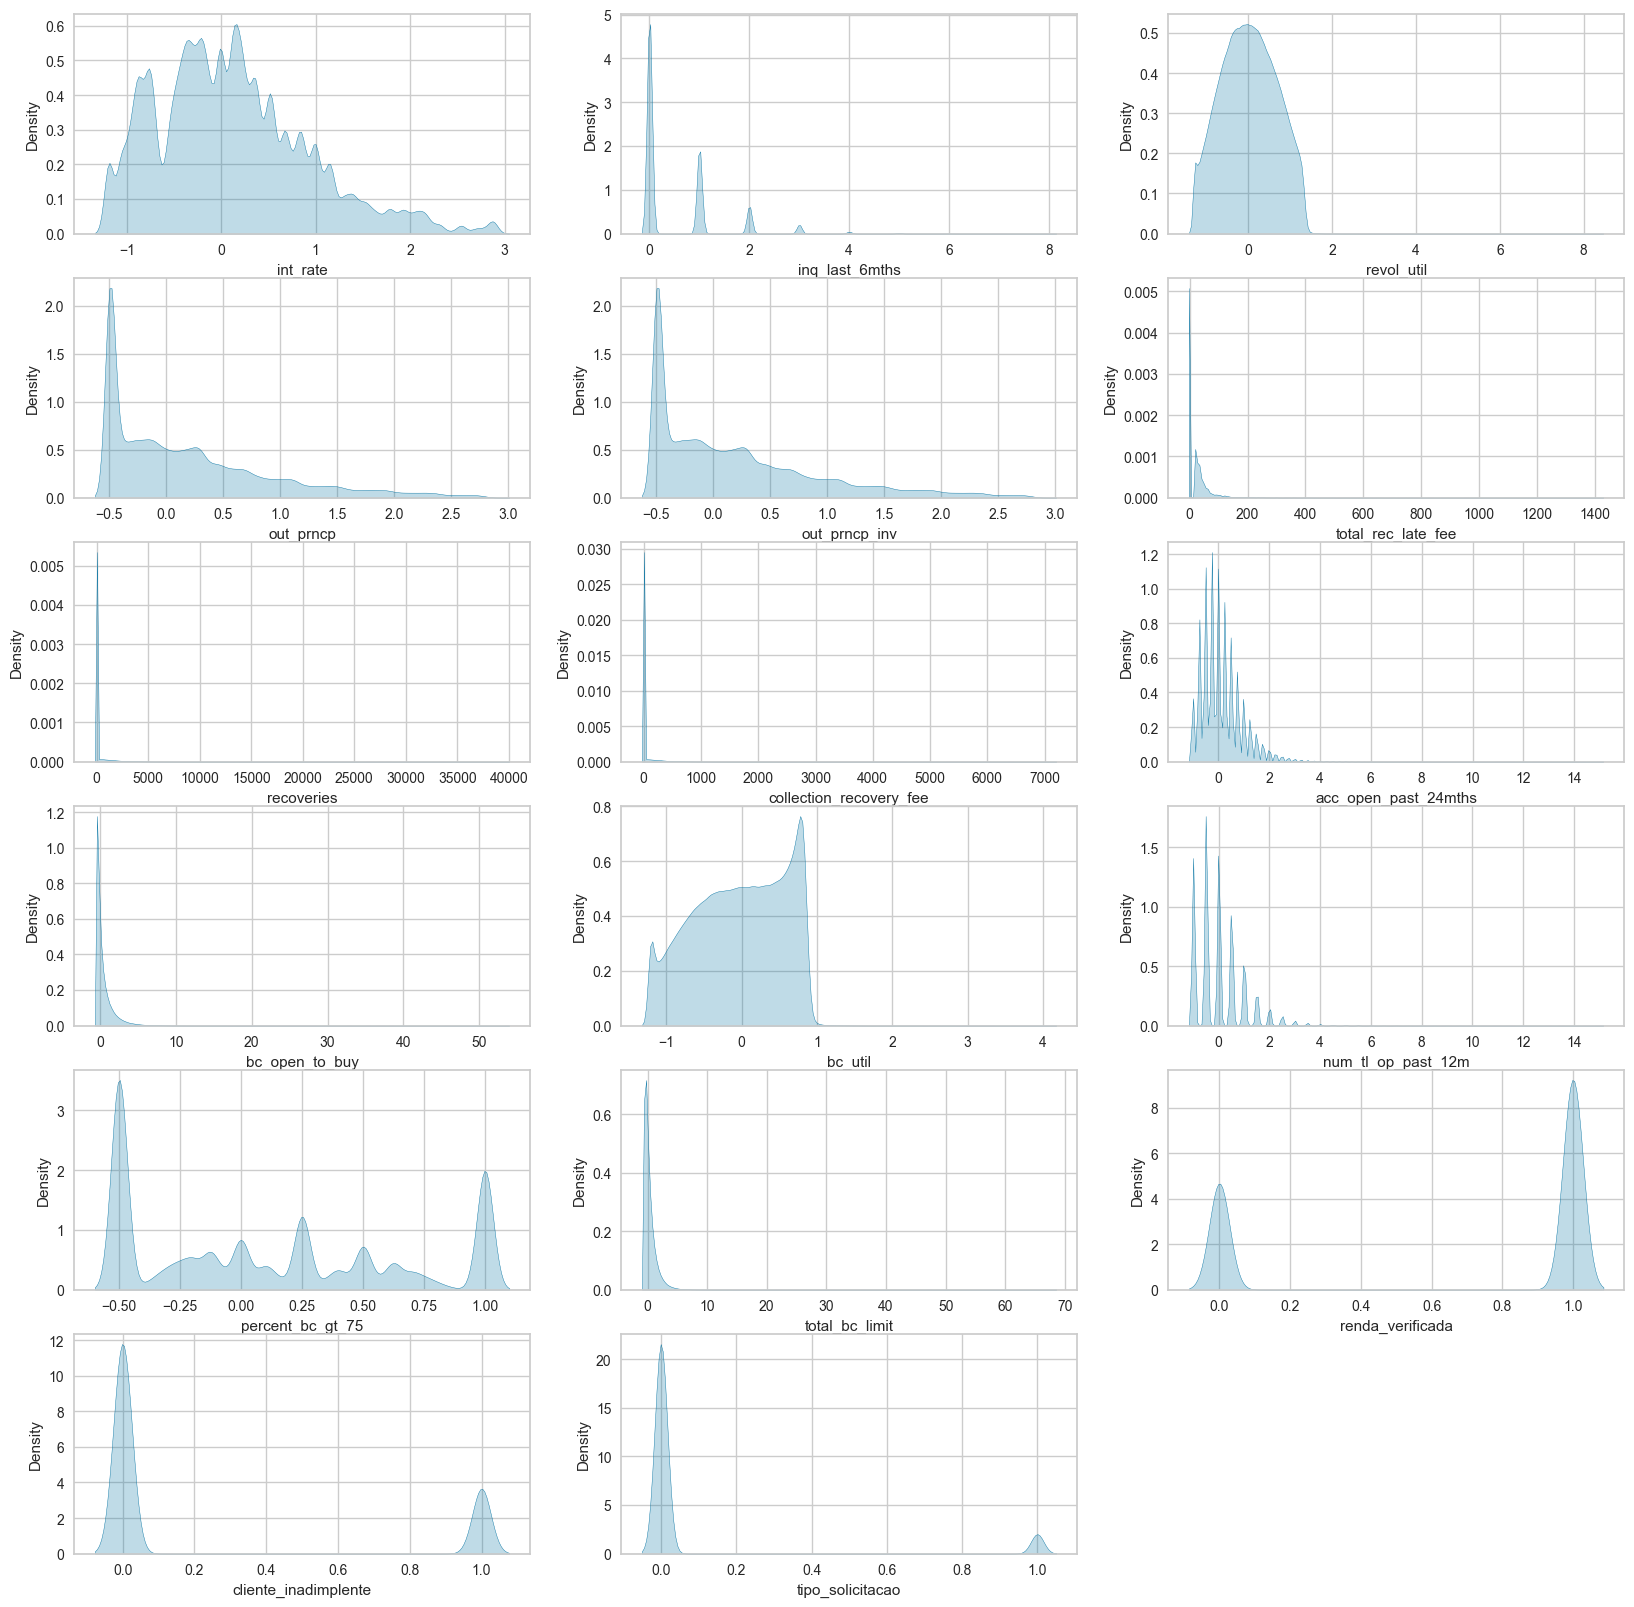

In [24]:
# Verificação do KDE (Kernel Density Estimation) para verificação da distorção dos valores nas colunas numéricas

colunas_numericas = df_limpo.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(20,20))

for i in range(len(colunas_numericas)):
    plt.subplot(6,3,i+1)
    sns.kdeplot(x=df_limpo[colunas_numericas[i]],shade=True,color='b')
    plt.xlabel(colunas_numericas[i])
    plt.tight_layout

In [25]:
# Configurar o ambiente do PyCaret
clf = setup(data=df_limpo, target='cliente_inadimplente', session_id=123 )

,Description,Value
0,Session id,123
1,Target,cliente_inadimplente
2,Target type,Binary
3,Original data shape,"(1215936, 17)"
4,Transformed data shape,"(1215936, 17)"
5,Transformed train set shape,"(851155, 17)"
6,Transformed test set shape,"(364781, 17)"
7,Numeric features,16
8,Rows with missing values,2.1%
9,Preprocess,True


In [26]:
# Verificar comparação entre modelos

best_model = compare_models(n_select=3, fold=3)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9742,0.9767,0.9117,0.9774,0.9434,0.9267,0.9276,8.3667
gbc,Gradient Boosting Classifier,0.9742,0.9768,0.9114,0.9779,0.9435,0.9268,0.9278,39.2700
lightgbm,Light Gradient Boosting Machine,0.9742,0.9776,0.9114,0.9780,0.9435,0.9268,0.9278,2.4167
rf,Random Forest Classifier,0.9741,0.9731,0.9113,0.9777,0.9434,0.9266,0.9276,25.6367
et,Extra Trees Classifier,0.9741,0.9719,0.9109,0.9780,0.9432,0.9265,0.9275,14.8433
dt,Decision Tree Classifier,0.9490,0.9321,0.9001,0.8858,0.8929,0.8594,0.8594,3.1367
knn,K Neighbors Classifier,0.9262,0.9390,0.7699,0.9035,0.8313,0.7845,0.7886,298.9100
lr,Logistic Regression,0.9232,0.9504,0.7028,0.9621,0.8123,0.7655,0.7804,1.9333
nb,Naive Bayes,0.9088,0.9276,0.6209,0.9889,0.7628,0.7100,0.7395,0.4667
svm,SVM - Linear Kernel,0.9076,0.9364,0.6348,0.9623,0.7645,0.7100,0.7341,1.6833


In [26]:
# Criação do modelo de melhor performance
model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9739,0.9763,0.9114,0.9764,0.9428,0.9259,0.9268
1,0.9735,0.9745,0.9075,0.9789,0.9418,0.9247,0.9258
2,0.9743,0.9775,0.9127,0.9771,0.9438,0.9272,0.9281
3,0.9744,0.9763,0.9112,0.9790,0.9439,0.9274,0.9284
4,0.9751,0.9779,0.9150,0.9782,0.9455,0.9294,0.9302
5,0.9742,0.9769,0.9127,0.9767,0.9436,0.9270,0.9278
6,0.9750,0.9780,0.9154,0.9775,0.9455,0.9293,0.9301
7,0.9737,0.9765,0.9095,0.9778,0.9424,0.9254,0.9264
8,0.9734,0.9757,0.9088,0.9769,0.9416,0.9243,0.9254


In [27]:
# Validação das métricas do modelo
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…